In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import folium
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
drive.mount('/content/drive/')
%cd drive/MyDrive/Project/

Mounted at /content/drive/
/content/drive/MyDrive/Project


In [2]:
data = pd.read_csv(r'Datasets/Boston_Housing_Dataset.csv', delimiter=',')

In [3]:
data.head()

OBS.        TOWN  TOWNNO  TRACT        LON        LAT  MEDV  CMEDV  \
0     0      Nahant       0   2011 -70.927800  42.426000  24.0   24.0   
1     1  Swampscott       1   2021 -70.919764  42.481455  21.6   21.6   
2     2  Swampscott       1   2022 -70.897264  42.473777  34.7   34.7   
3     3  Marblehead       2   2031 -70.884407  42.490840  33.4   33.4   
4     4  Marblehead       2   2032 -70.874764  42.499371  36.2   36.2   

      CRIM    ZN  ...  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0  ...     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0  ...     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0  ...     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0  ...     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0  ...     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  

[5 rows x 21 columns]

In [ ]:
data.shape

(506, 21)

### Checking for information on columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OBS.     506 non-null    int64  
 1   TOWN     506 non-null    object 
 2   TOWNNO   506 non-null    int64  
 3   TRACT    506 non-null    int64  
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   MEDV     506 non-null    float64
 7   CMEDV    506 non-null    float64
 8   CRIM     506 non-null    float64
 9   ZN       506 non-null    float64
 10  INDUS    506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  NOX      506 non-null    float64
 13  RM       506 non-null    float64
 14  AGE      506 non-null    float64
 15  DIS      506 non-null    float64
 16  RAD      506 non-null    int64  
 17  TAX      506 non-null    int64  
 18  PTRATIO  506 non-null    float64
 19  B        506 non-null    float64
 20  LSTAT    506 non-null    float64
dtypes: float64(14), 

In [ ]:
data.describe()

OBS.      TOWNNO        TRACT         LON         LAT  \
count  506.000000  506.000000   506.000000  506.000000  506.000000   
mean   252.500000   47.531621  2700.357708  -71.090748   42.360205   
std    146.213884   27.571401  1380.038110    0.121188    0.105411   
min      0.000000    0.000000     1.000000  -71.465395   42.042081   
25%    126.250000   26.250000  1303.250000  -71.149950   42.299349   
50%    252.500000   42.000000  3393.500000  -71.085141   42.363037   
75%    378.750000   78.000000  3739.750000  -71.031663   42.421308   
max    505.000000   91.000000  5082.000000  -70.694762   42.640995   

             MEDV       CMEDV        CRIM          ZN       INDUS        CHAS  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.532806   22.528854    3.613524   11.363636   11.136779    0.069170   
std      9.197104    9.182176    8.601545   23.322453    6.860353    0.253994   
min      5.000000    5.000000    0.006320    0.000000    0.460000    0.000000   
25%     17.025000   17.025000    0.082045    0.000000    5.190000    0.000000   
50%     21.200000   21.200000    0.256510    0.000000    9.690000    0.000000   
75%     25.000000   25.000000    3.677083   12.500000   18.100000    0.000000   
max     50.000000   50.000000   88.976200  100.000000   27.740000    1.000000   

              NOX          RM         AGE         DIS         RAD         TAX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.554695    6.284634   68.574901    3.795043    9.549407  408.237154   
std      0.115878    0.702617   28.148861    2.105710    8.707259  168.537116   
min      0.385000    3.561000    2.900000    1.129600    1.000000  187.000000   
25%      0.449000    5.885500   45.025000    2.100175    4.000000  279.000000   
50%      0.538000    6.208500   77.500000    3.207450    5.000000  330.000000   
75%      0.624000    6.623500   94.075000    5.188425   24.000000  666.000000   
max      0.871000    8.780000  100.000000   12.126500   24.000000  711.000000   

          PTRATIO           B       LSTAT  
count  506.000000  506.000000  506.000000  
mean    18.455534  356.674032   12.653063  
std      2.164946   91.294864    7.141062  
min     12.600000    0.320000    1.730000  
25%     17.400000  375.377500    6.950000  
50%     19.050000  391.440000   11.360000  
75%     20.200000  396.225000   16.955000  
max     22.000000  396.900000   37.970000

In [ ]:
data.isnull().sum()

OBS.       0
TOWN       0
TOWNNO     0
TRACT      0
LON        0
LAT        0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Checking for duplicates

In [ ]:
print(data.duplicated().any())

False


Distribution of target variable

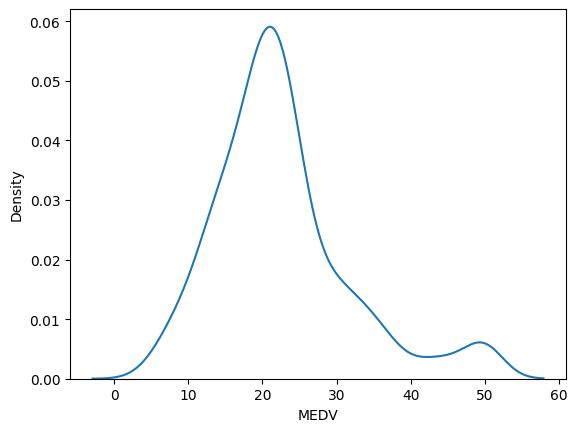

In [ ]:
sns.kdeplot(data, x='MEDV');

It seems the dritibution of target variable is not truly guassian it seems to have two tails at the right side of the distribution

## Relationship between the features and class labels



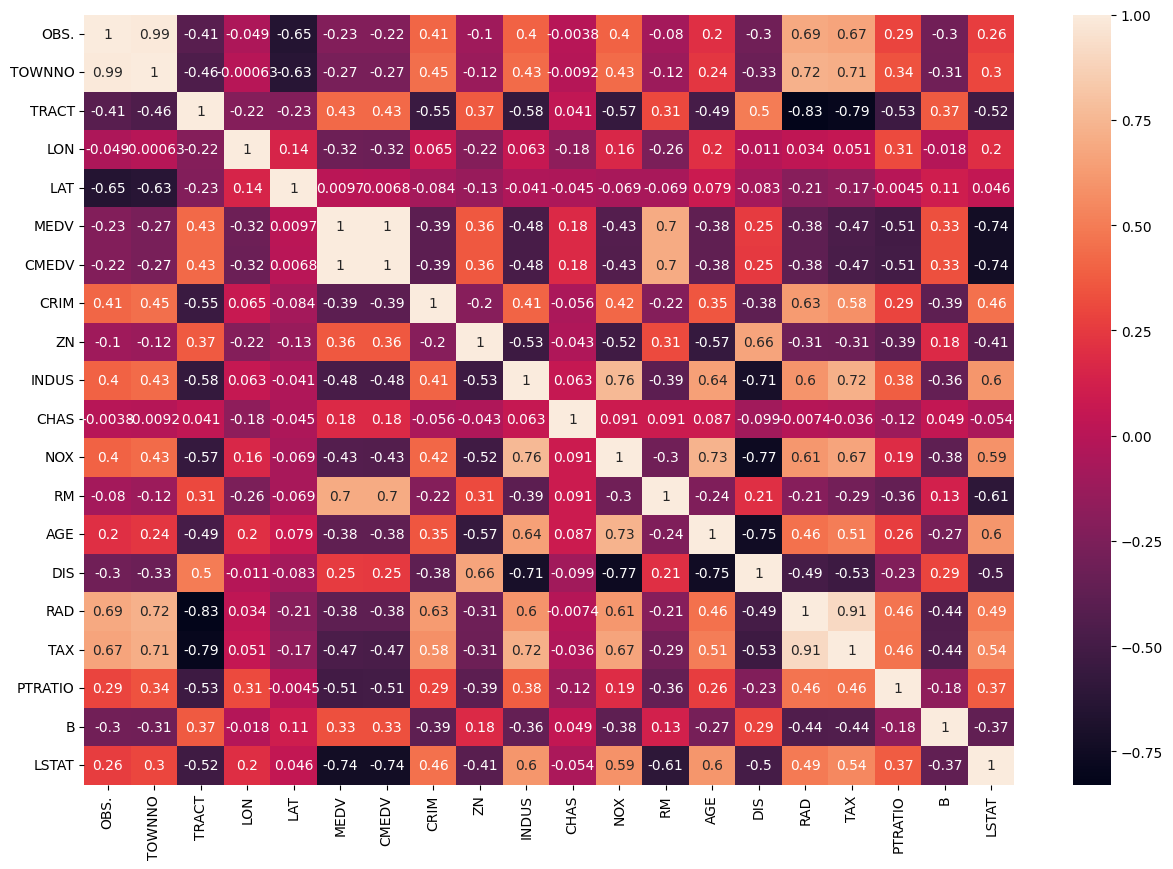

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax= sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(),annot = True,);

### Exploring the relationship between different variables and the median value of owner-occupied housing (MEDV).

- To explore MEDV and other variables such as CRIM (per capita crime rate), RM (average number of rooms per dwelling), and LSTAT (percentage of lower status population).

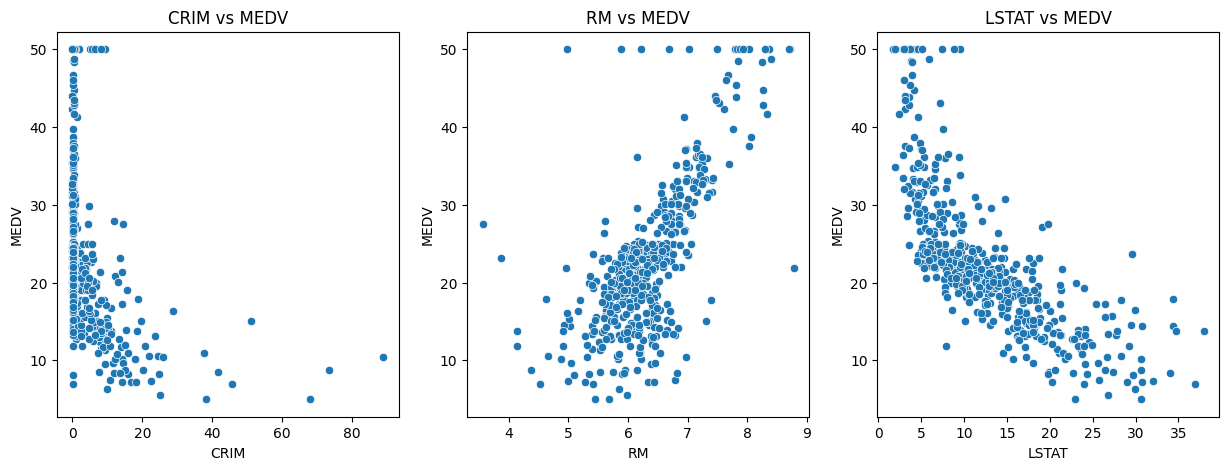

In [ ]:

x_columns = ['CRIM', 'RM', 'LSTAT']

fig, axs = plt.subplots(1, len(x_columns), figsize=(15, 5))

for i, column in enumerate(x_columns):
    sns.scatterplot(data=data, x=column, y='MEDV', ax=axs[i])
    axs[i].set_title(f'{column} vs MEDV');

from the first plot shows the relationship between Crime rate to House Price in $1000s (CRIM vs MEDV), it appears that there is a negative correlation between the per capita crime rate and the median value of owner-occupied homes. That is as the crime rate increases, the median value of homes tends to decrease.

From the second plot shows the relationship between Rooms per Dwelling and House price in $1000s (RM vs MEDV), it appears that there is a positive correlation between the average number of rooms per dwelling and the median value of owner-occupied homes. Which means as the average number of rooms increases, the median value of homes also tends to increase.

From the third plot the relationship between percentage of Lower Status of Population vs. House Price(LSTAT vs MEDV), it appears that there is a negative correlation between the percentage of lower status population and the median value of owner-occupied homes as the percentage of lower status population increases, the median value of homes tends to decrease.

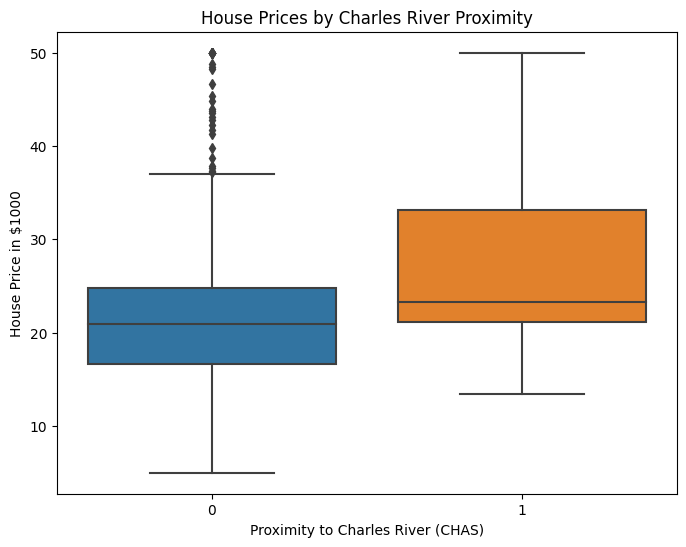

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='CHAS', y='MEDV', data=data)
plt.xlabel('Proximity to Charles River (CHAS)')
plt.ylabel('House Price in $1000')
plt.title('House Prices by Charles River Proximity')
plt.show()

This shows that the proximity from Charles river have affected the house price the proximity closer to Charles river have a higher price compared to the once which are further from river

Creating new features

In [ ]:
data['CRIM_ZN'] = data['CRIM'] * data['ZN']
data['CRIM_squared'] = data['CRIM'] ** 2
data['log_CRIM'] = np.log(data['CRIM'])

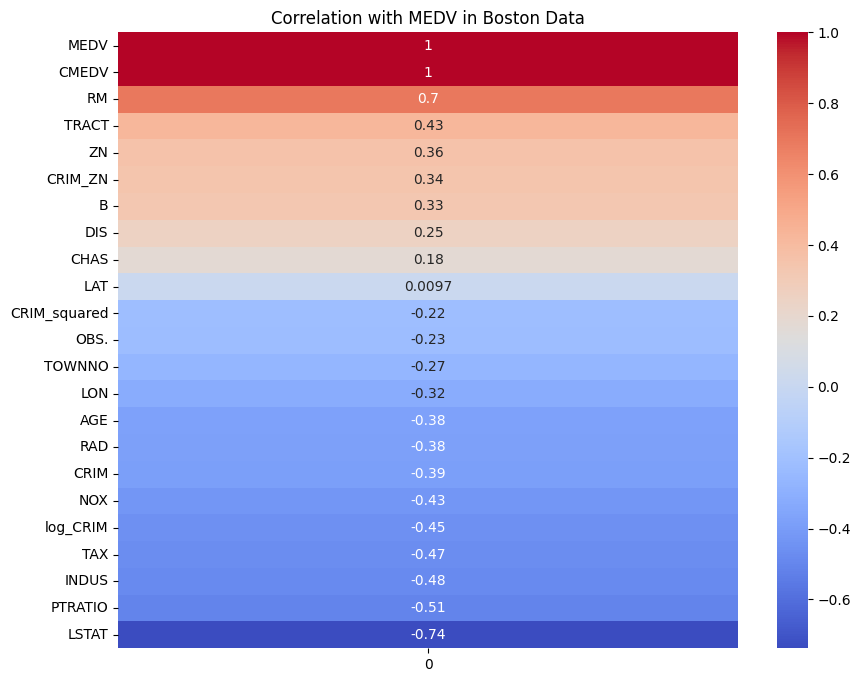

In [ ]:
correlation = data.select_dtypes(include=['int64', 'float64']).corrwith(data['MEDV'])
correlation = correlation.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with MEDV in Boston Data')
plt.show()

CMED and MED are highly corelated while Tract,PTRATIO, INDUS,LSTAT,RM and newly created features show some correlations witht the house price
while lat shows almost zero corelation

### Top 10 towns with high prices in boston

In [ ]:
data['price_category'] = pd.cut(data['MEDV'], bins=[0, np.percentile(data['MEDV'], 33), np.percentile(data['MEDV'], 67), np.inf], labels=['low', 'medium', 'high'])
town_price = data.groupby('TOWN')['MEDV'].mean().reset_index()

## Feature Analysis and Data Visualization

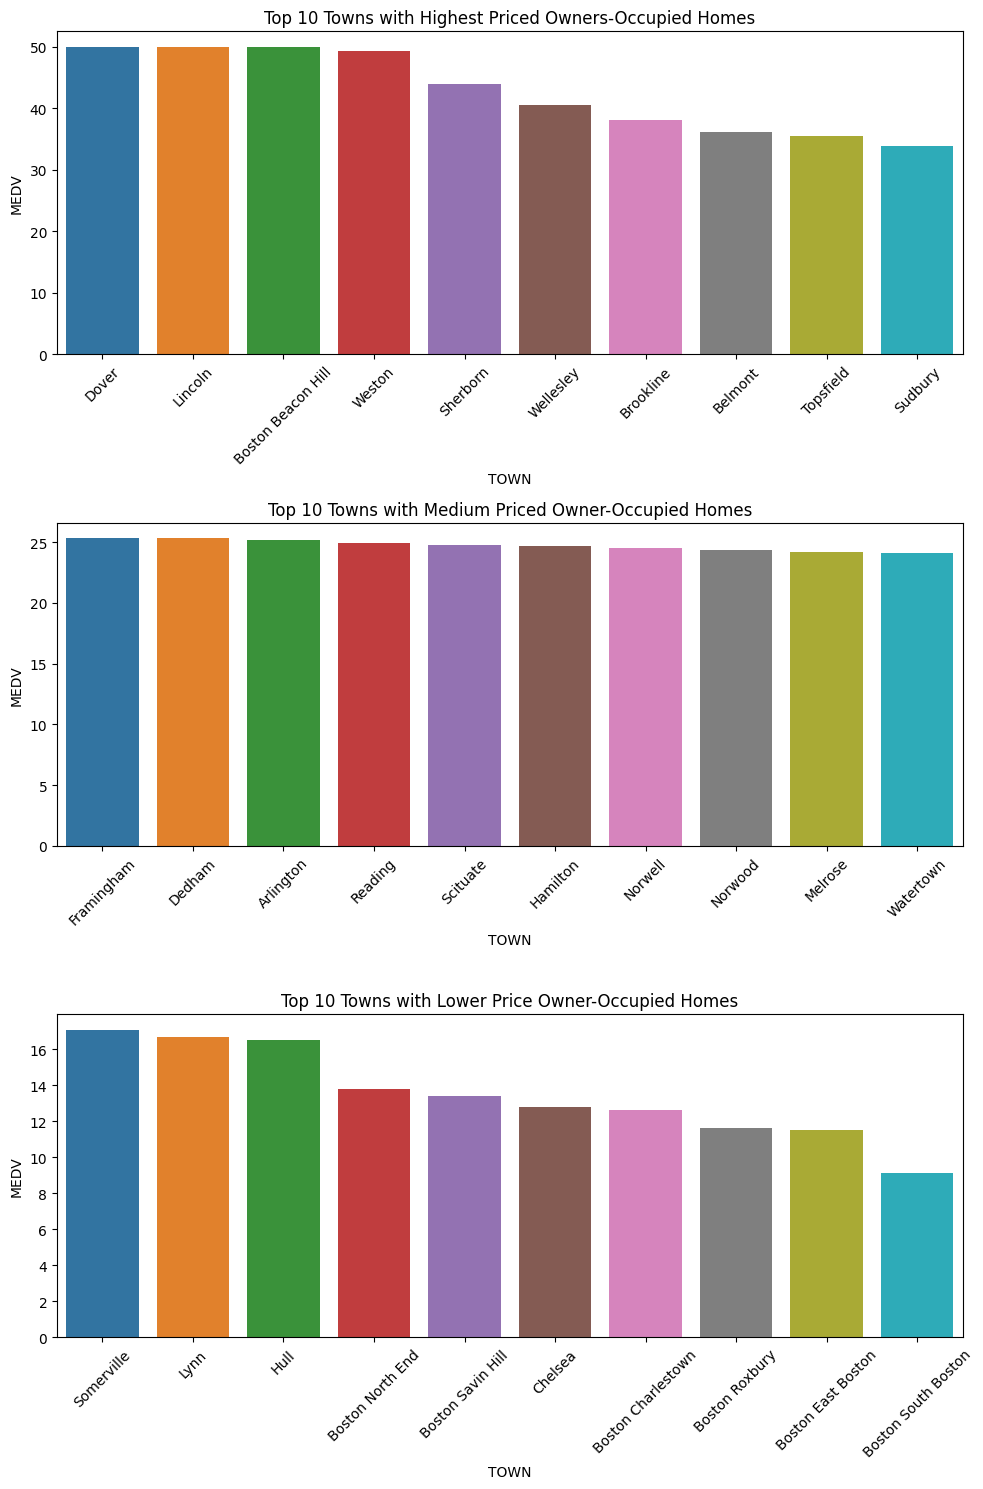

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
top_10_high = town_price.sort_values(by='MEDV', ascending=False).head(10)
sns.barplot(data=top_10_high, x='TOWN', y='MEDV', ax=axes[0])
axes[0].set_title('Top 10 Towns with Highest Priced Owners-Occupied Homes')
top_10_medium = town_price.sort_values(by='MEDV', ascending=False).iloc[round(len(town_price)/3):round(len(town_price)/3)+10]
sns.barplot(data=top_10_medium, x='TOWN', y='MEDV', ax=axes[1])
axes[1].set_title('Top 10 Towns with Medium Priced Owner-Occupied Homes')
top_10_low = town_price.sort_values(by='MEDV', ascending=False).tail(10)
sns.barplot(data=top_10_low, x='TOWN', y='MEDV', ax=axes[2])
axes[2].set_title('Top 10 Towns with Lower Price Owner-Occupied Homes')

# Rotate the x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

### 10 most cheapest towns in boston dataset

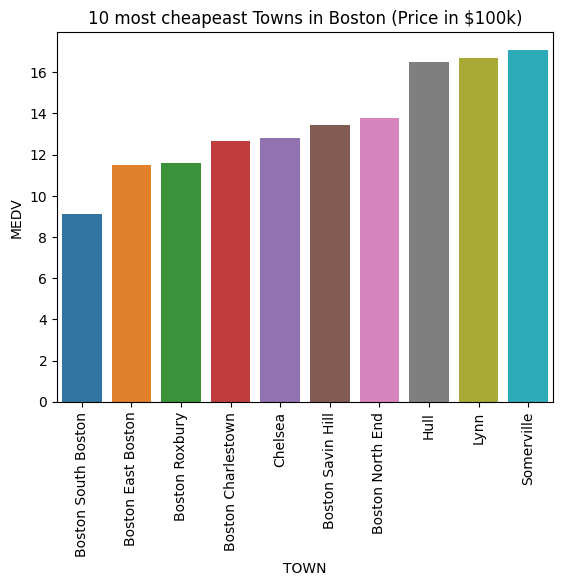

In [ ]:
cheapest_10_towns = town_price.sort_values(by='MEDV', ascending=True).head(10)
# print(cheapest_10_towns)
sns.barplot(data=cheapest_10_towns,x='TOWN',y='MEDV');
plt.title('10 most cheapeast Towns in Boston (Price in $100k)');
plt.xticks(rotation=90);

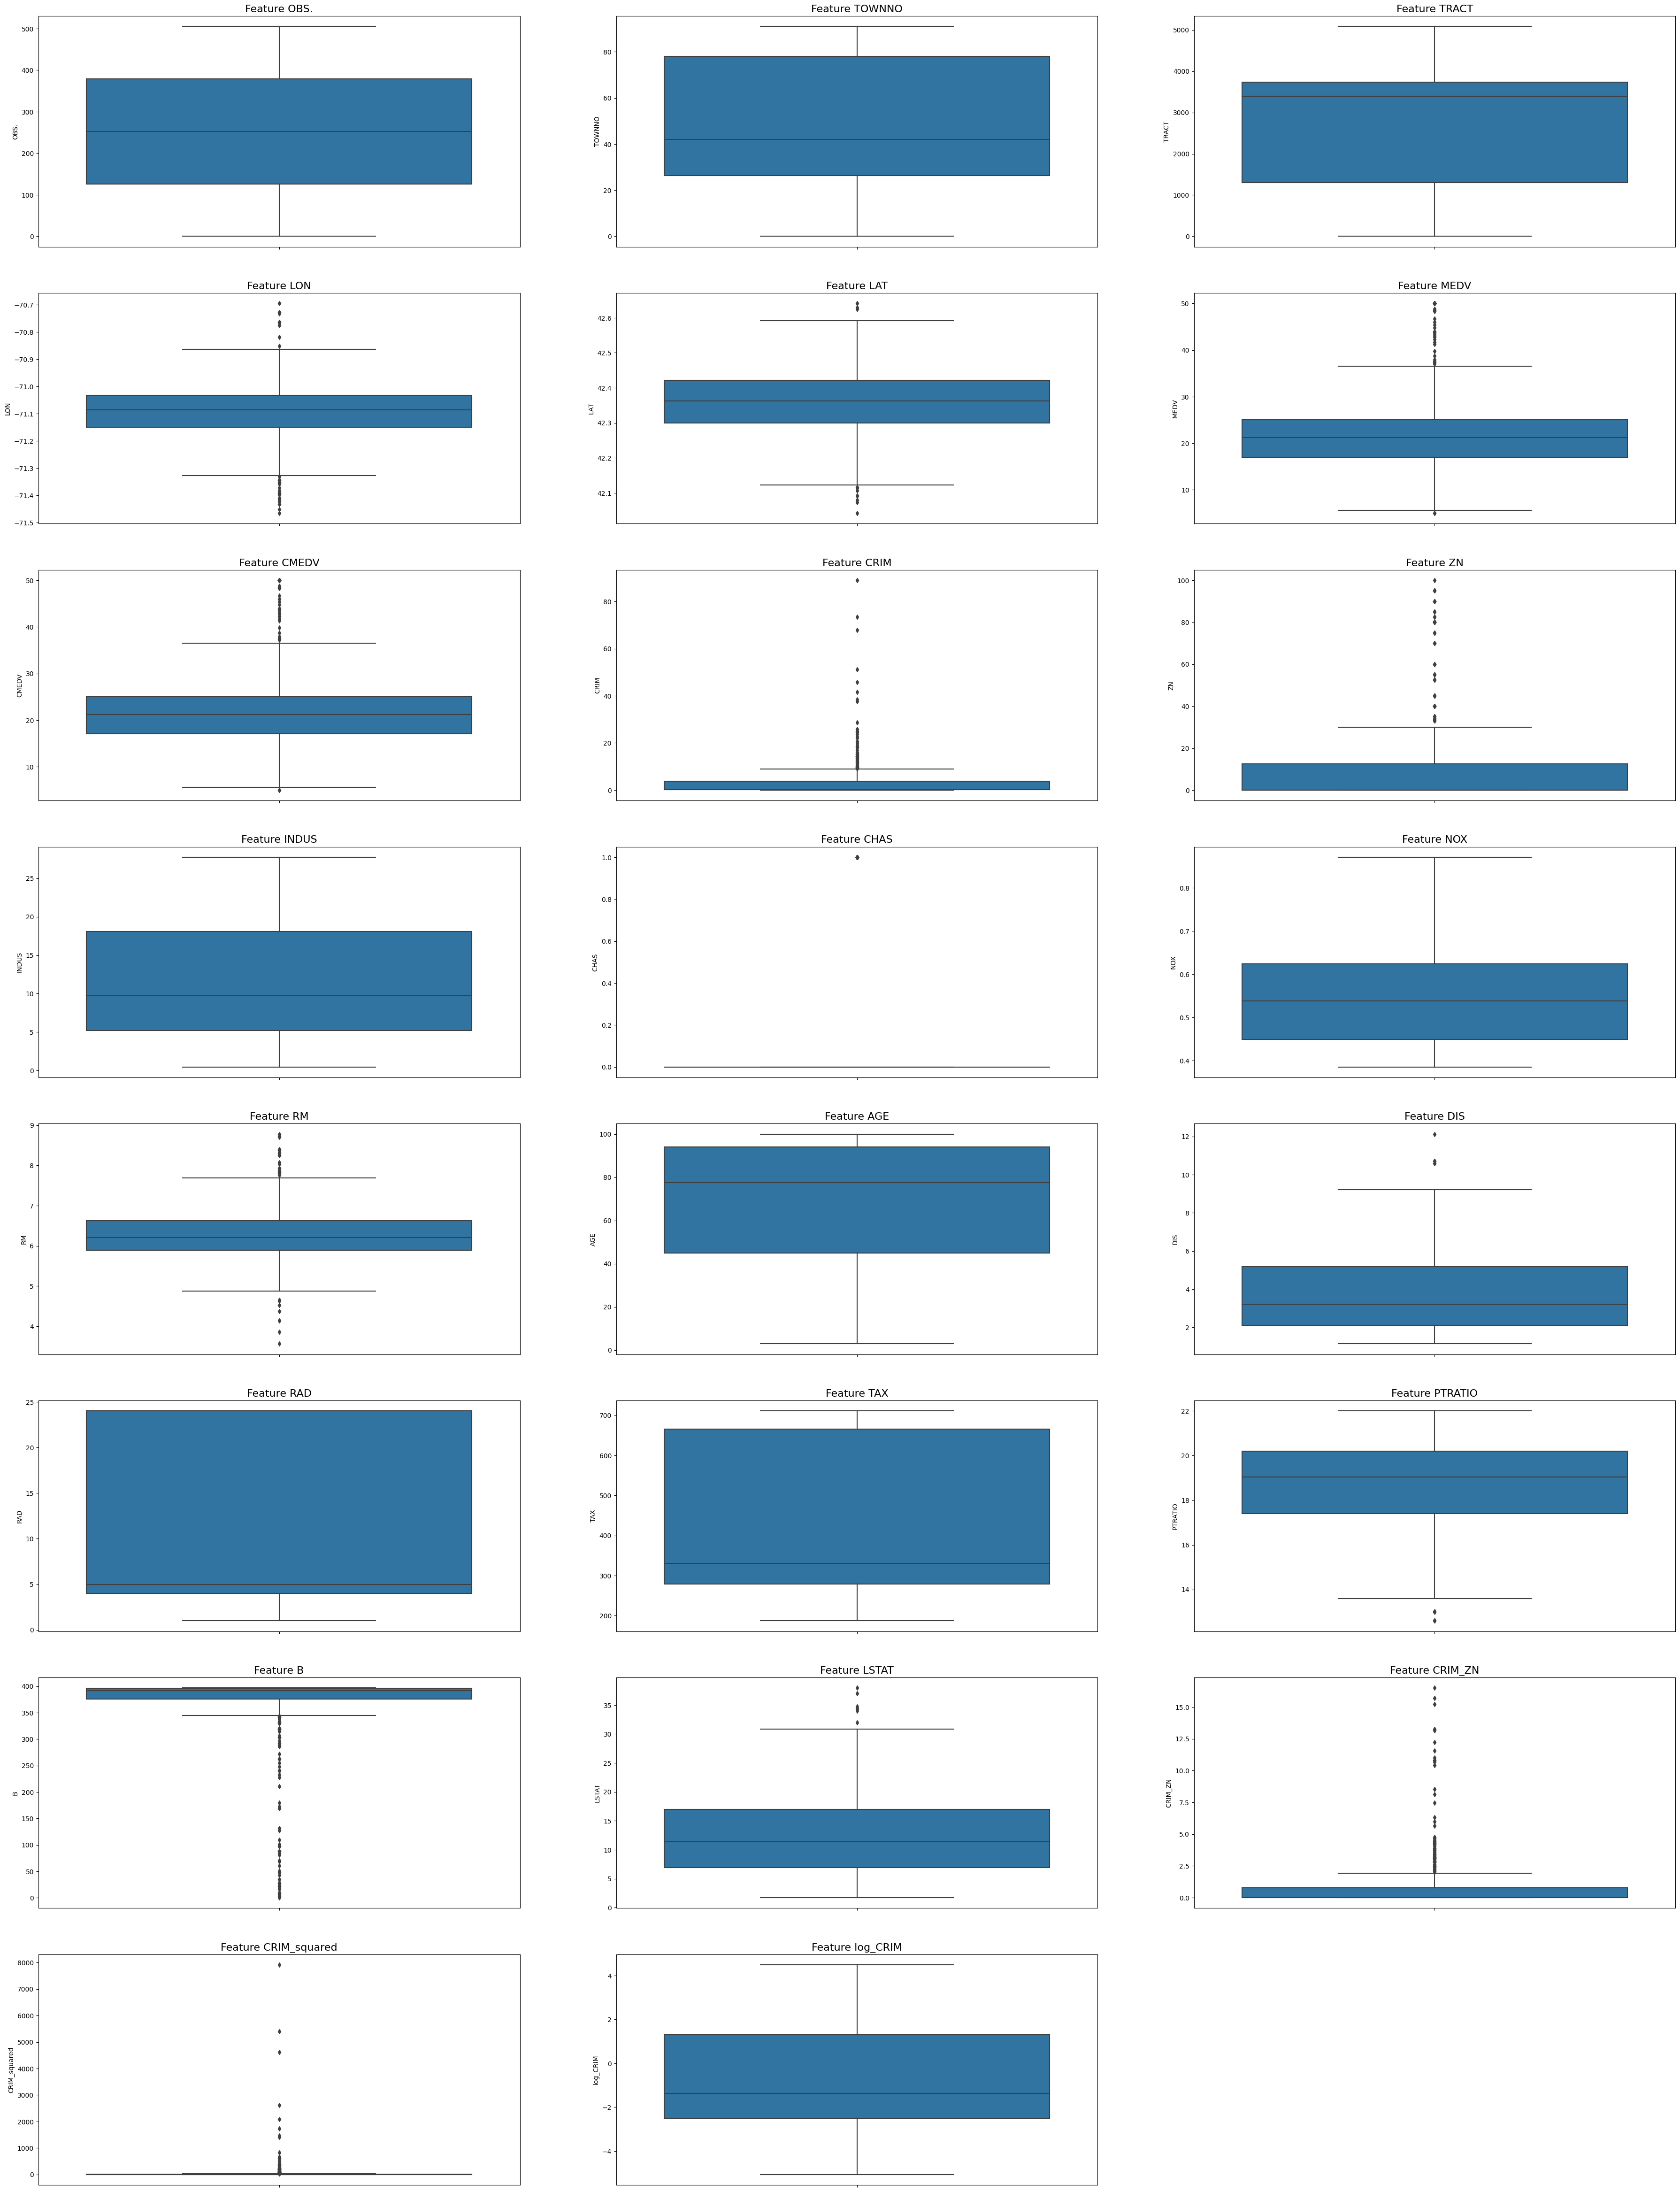

In [ ]:
num_features = data.select_dtypes(include=['int64', 'float64']).shape[1]

fig, axes = plt.subplots(nrows=(num_features + 2) // 3, ncols=3, figsize=(45, 60))

for i, col in enumerate(data.select_dtypes(include=['int64', 'float64']).columns):
    ax = axes.flat[i]
    feature_data = data.select_dtypes(include=['int64', 'float64'])[col]
    sns.boxplot(y=feature_data, ax=ax)
    ax.set_title(f'Feature {col}', fontsize=16)

for j in range(num_features, (num_features + 2) // 3 * 3):
    axes.flat[j].axis('off')

plt.show()

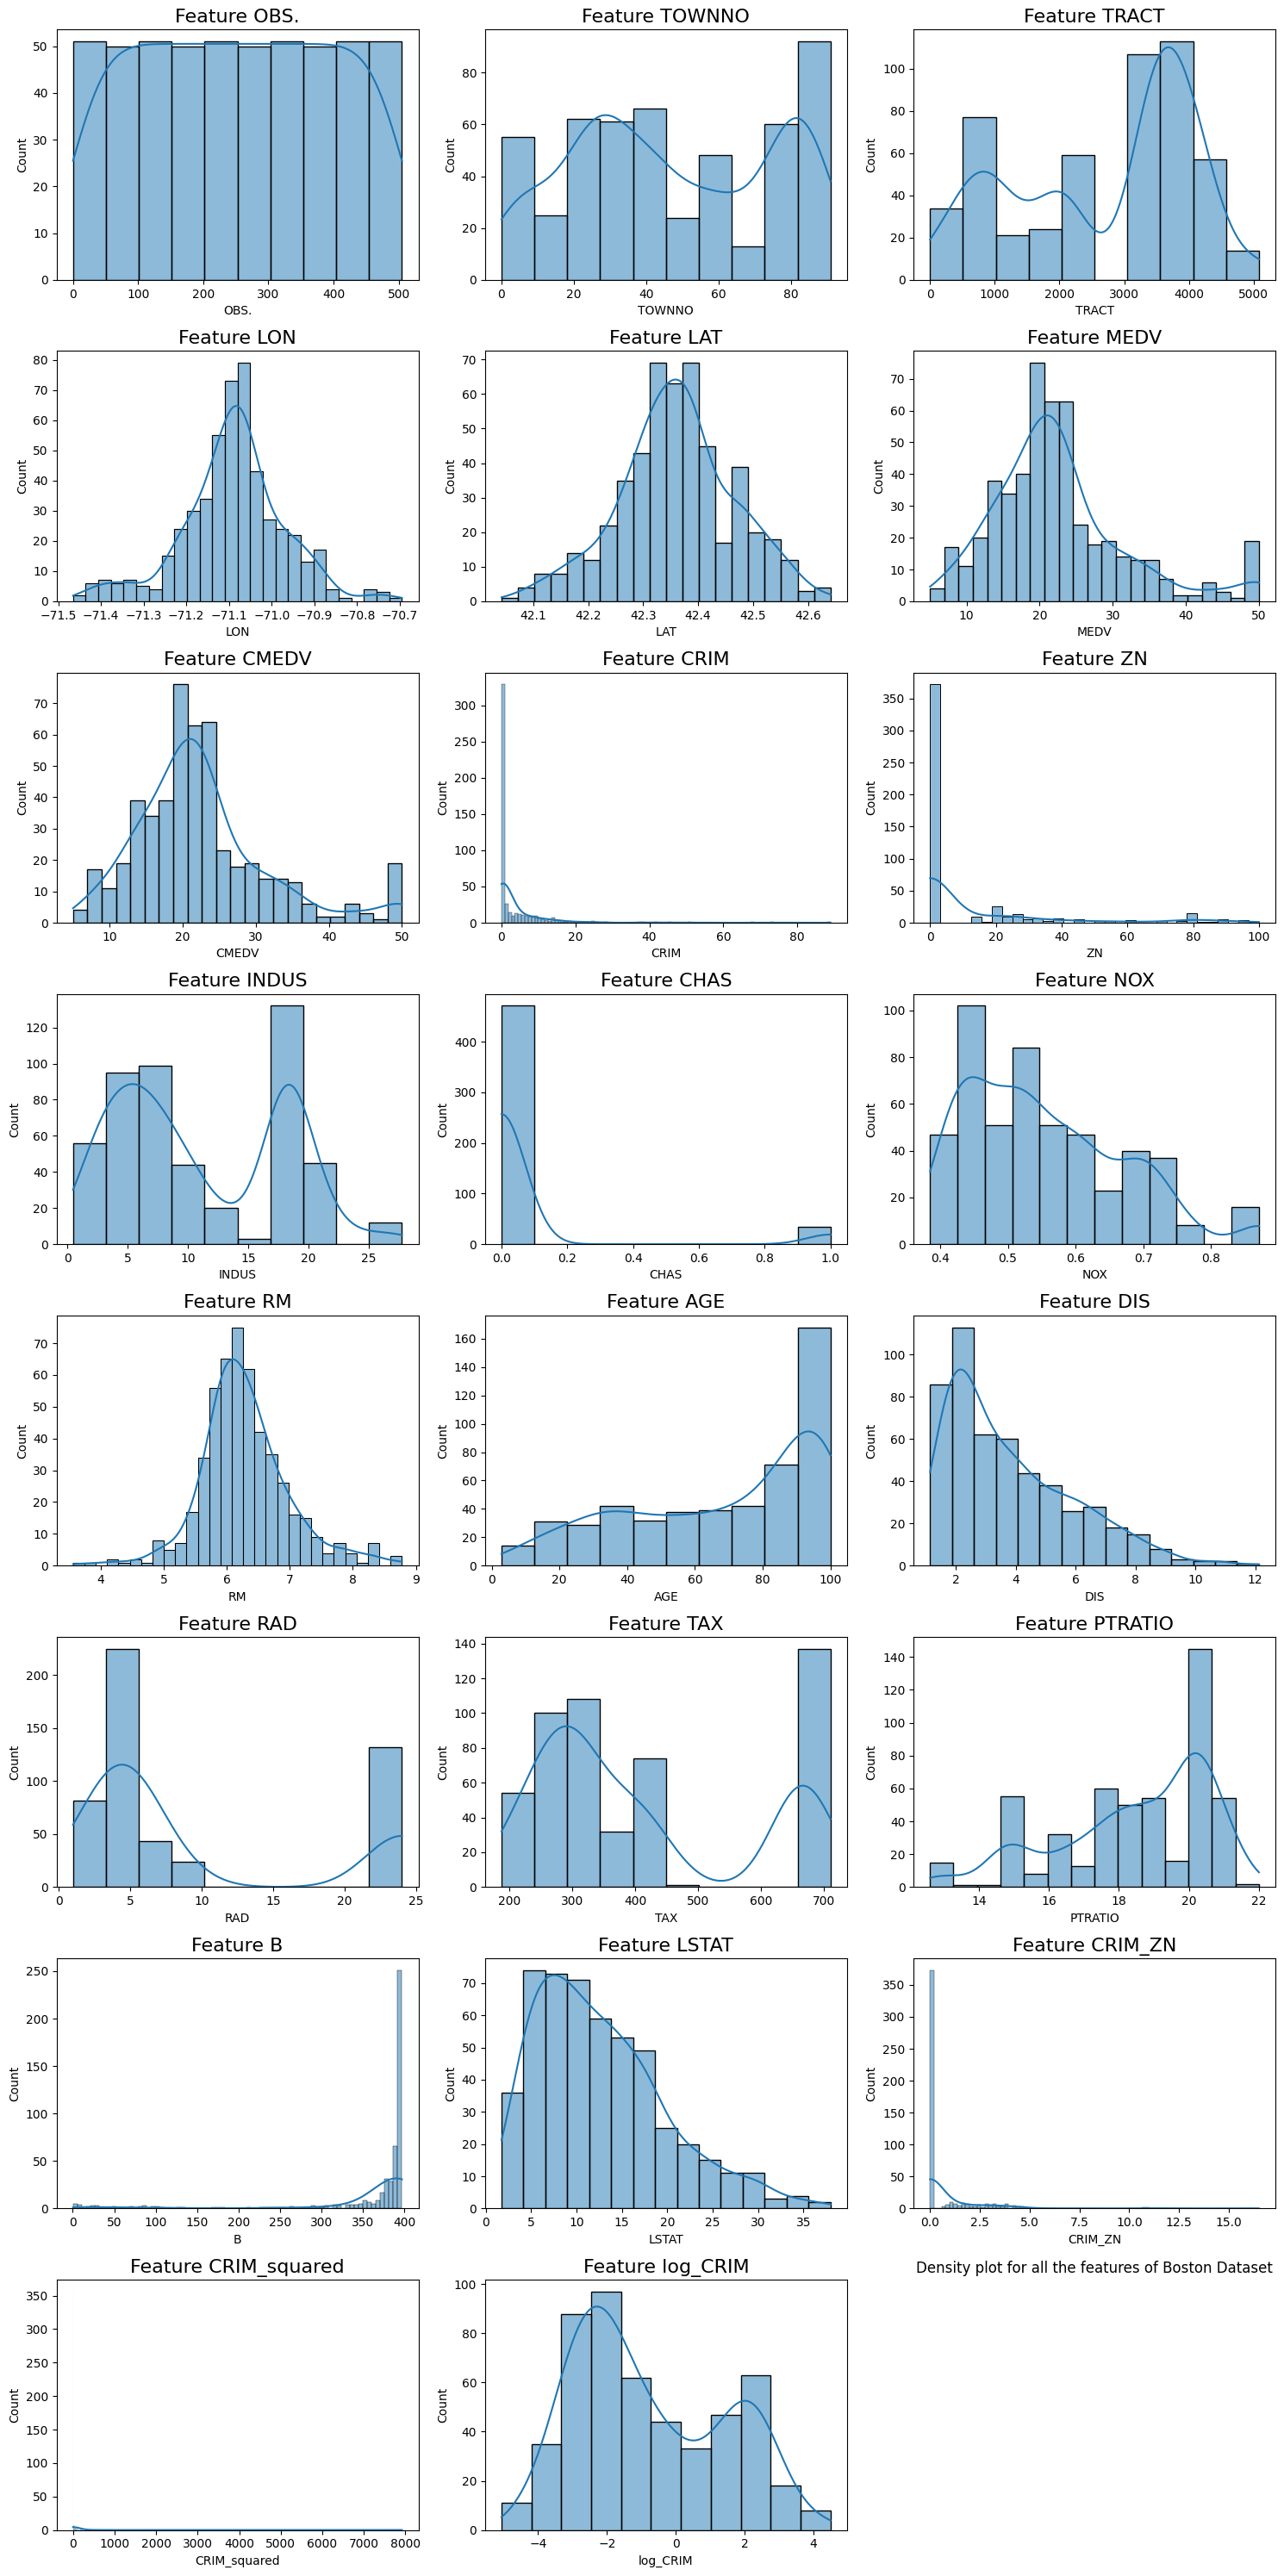

In [ ]:
num_data = data.select_dtypes(include=['int64', 'float64'])
num_features = num_data.shape[1]
num_rows = (num_features + 2) // 3
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))

for i, col in enumerate(num_data.columns):
    ax = axes.flat[i]
    feature_data = num_data[col]
    sns.histplot(feature_data, kde=True, ax=ax)
    ax.set_title(f'Feature {col}', fontsize=16)

for j in range(num_features, num_rows * num_cols):
    axes.flat[j].axis('off')
plt.title('Density plot for all the features of Boston Dataset')
plt.tight_layout()
plt.show()

Looking at the distribution we can conclude that 3 columns follows a guassian distributin these are Latitude, Longtitude & average number of rooms per dwelling

# Geographical region analysis
- Here we try to plot on the map lines to create a CircleMarker at the specified location.
- The color and fill_color of the marker are determined by the value of medv: <br>
  if medv is less than 25, the marker is colored green; otherwise, it is colored red.
- Finally, the marker is added to the map.

In [ ]:

map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
for lat, lon, medv in zip(data['LAT'], data['LON'], data['MEDV']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color='green' if medv < 25 else 'red'
    ).add_to(map)
map


From this we can see that price of property is a region based price as the prices in the city center of boston and near airport seems to be lower than 25k while outer regions of city like Newton, Westwood, Marblehead and Milton have a much higher price than median 25k

In [ ]:
map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
for lat, lon, rm,medv in zip(data['LAT'], data['LON'], data['RM'],data['MEDV']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color='blue' if rm < 6.5 and medv<25 else 'orange'
    ).add_to(map)
map


## Splitting the Data into **Train and Test Set**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis = 1), data['MEDV'], random_state = 1501)

In [ ]:
X_train.head()

OBS.                 TOWN  TOWNNO  TRACT        LON        LAT  CMEDV  \
260   260            Brookline      45   4004 -71.128695  42.338978   33.8   
59     59              Beverly      13   2172 -70.903693  42.557386   19.6   
482   482  Boston West Roxbury      87   1303 -71.144767  42.274992   25.0   
276   276              Needham      47   4033 -71.225928  42.269361   33.2   
122   122              Everett      26   3423 -71.060712  42.412350   20.5   

        CRIM    ZN  INDUS  ...     DIS  RAD  TAX  PTRATIO       B  LSTAT  \
260  0.54011  20.0   3.97  ...  2.1121    5  264     13.0  392.80   9.59   
59   0.10328  25.0   5.13  ...  6.9320    8  284     19.7  396.90   9.22   
482  5.73116   0.0  18.10  ...  3.4106   24  666     20.2  395.28   7.01   
276  0.10469  40.0   6.41  ...  4.7872    4  254     17.6  389.25   6.05   
122  0.09299   0.0  25.65  ...  2.0869    2  188     19.1  378.09  17.93   

     CRIM_ZN  CRIM_squared  log_CRIM  price_category  
260  10.8022      0.291719 -0.615982            high  
59    2.5820      0.010667 -2.270312          medium  
482   0.0000     32.846195  1.745918            high  
276   4.1876      0.010960 -2.256752            high  
122   0.0000      0.008647 -2.375263          medium  

[5 rows x 24 columns]

## Normalizing the dataset using Minmaxscalar

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))


In [ ]:
y_train.reset_index(drop = True, inplace=True)
y_test.reset_index(drop = True, inplace=True)

# Applying KNN

In [ ]:
from KNN import KNNRegressor

Please note distance type 1 is manhattan distance while distance type 2 which is defaulted is euclidian distance

In [ ]:
param_grid = {
    'n_neighbors': range(1, 6),
    'distance_type': [ 1, 2],
    'weighted': [True, False]
}

optimal_score = 0.0
optimal_params = {}

for n in param_grid['n_neighbors']:
    for d in param_grid['distance_type']:
        for w in param_grid['weighted']:
            params = {'n_neighbors': n, 'distance_type': d, 'weighted': w}
            knn_model = KNNRegressor(**params)
            knn_model.fit(X_train_scaled, y_train)
            current_score = knn_model.score(X_test_scaled, y_test)
            if current_score > optimal_score:
                optimal_score = current_score
                optimal_params = params

print(f'Optimal hyperparameters: {optimal_params}')
print(f'Optimal Score: {optimal_score}')

KNNRegressor(n_neighbors=1, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=1, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=1, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=1, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=4, dista

In [ ]:
knn_model_score=optimal_score

In [ ]:

train_score = []
test_score = []

neighbors = range(1, 71)
for n in neighbors:
    # Build the model
    knn = KNNRegressor(n_neighbors=n, distance_type = optimal_params['distance_type'], weighted = optimal_params['weighted'])
    knn.fit(X_train_scaled, y_train)
    # Getting Training Score
    train_score.append(knn.score(X_train_scaled, y_train))
    # Getting Test Score
    test_score.append(knn.score(X_test_scaled, y_test))


KNNRegressor(n_neighbors=1, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=5, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=6, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=7, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=8, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=9, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=10, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=11, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=12, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=13, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=14, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=15, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=16, dista

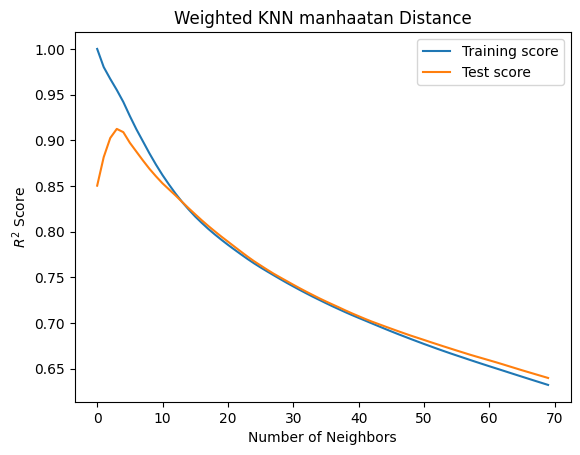

In [ ]:
    sns.lineplot(train_score, label='Training score')
    sns.lineplot(test_score, label='Test score')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('$R^2$ Score')
    plt.legend()
    plt.title('Weighted KNN manhaatan Distance');



<a id='rfr'></a>
## Applying Random Forest Regression

In [ ]:
# Maximum number of features to consider at each node
p = int(np.ceil(X_train.shape[1]/3))

In [ ]:
from RandomForest import RandomForestRegressor

In [ ]:
param_grid = {

    'min_samples_split': [2, 10, 100],
    'max_depth': [5, 15, 25],
    'n_estimators':[2,5,10,15,25]
}
best_score = 0.0
best_params = {}

for s in param_grid['min_samples_split']:
    for d in param_grid['max_depth']:
        for j in param_grid['n_estimators']:
          params = {'min_samples_split': s, 'max_depth': d}
          rf = RandomForestRegressor(n_estimators=j, max_features=p, **params)
          rf.fit(X_train_scaled, y_train.to_numpy())
          current_score = rf.score_r2(X_test_scaled, y_test)
          if current_score > best_score:
              best_score = current_score
              best_params = params
              best_params['n_estimators']=j
          print(f'For n_estimator {j} , sample split {s} and max depth {d} the current score is {current_score}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score}')

For n_estimator 2 , sample split 2 and max depth 5 the current score is 0.9649511062182223
For n_estimator 5 , sample split 2 and max depth 5 the current score is 0.9285709202452893
For n_estimator 10 , sample split 2 and max depth 5 the current score is 0.9432339856274045
For n_estimator 15 , sample split 2 and max depth 5 the current score is 0.94413449675016
For n_estimator 25 , sample split 2 and max depth 5 the current score is 0.9752856940436392
For n_estimator 2 , sample split 2 and max depth 15 the current score is 0.8942806767969134
For n_estimator 5 , sample split 2 and max depth 15 the current score is 0.9251192911017343
For n_estimator 10 , sample split 2 and max depth 15 the current score is 0.9677061902213042
For n_estimator 15 , sample split 2 and max depth 15 the current score is 0.9799681131527231
For n_estimator 25 , sample split 2 and max depth 15 the current score is 0.9775606198427385
For n_estimator 2 , sample split 2 and max depth 25 the current score is 0.914893

In [ ]:
random_forest_score=best_score

In [ ]:
p = [i for i in range(1,int(np.ceil(X_train_scaled.shape[1]/3)+2))]
train_score = []
test_score = []
for i in p:
    rf = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = best_params['max_depth'],
                               max_features = i)
    rf.fit(X_train_scaled, y_train.to_numpy())
    train_score.append(rf.score_r2(X_train_scaled, y_train.to_numpy()))
    test_score.append(rf.score_r2(X_test_scaled, y_test.to_numpy()))

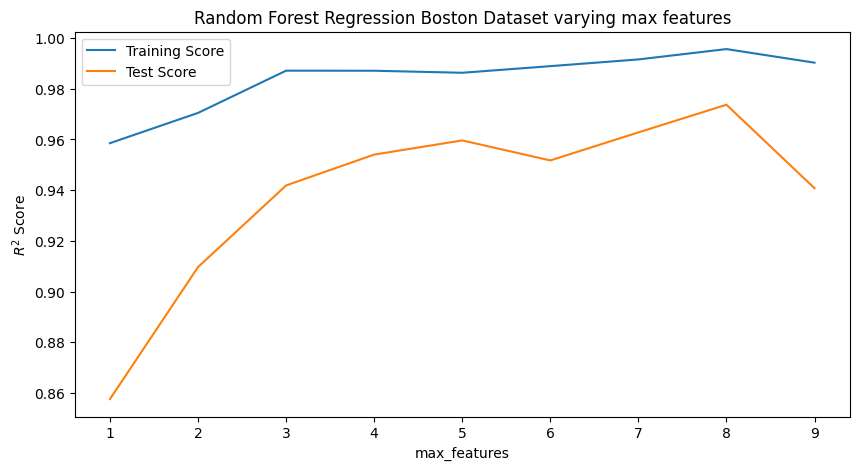

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=p, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=p, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'max_features',
       ylabel = '$R^2$ Score',
       xticks =p,
       title = 'Random Forest Regression Boston Dataset varying max features')
ax.legend();

In [ ]:
p=int(np.ceil(X_train_scaled.shape[1]/3))
train_score = []
test_score = []
num_trees = [50, 100, 250,500]
for n in num_trees:
    rf = RandomForestRegressor(n_estimators = n,
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = best_params['max_depth'],
                               max_features = p)
    rf.fit(X_train_scaled, y_train.to_numpy())
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))


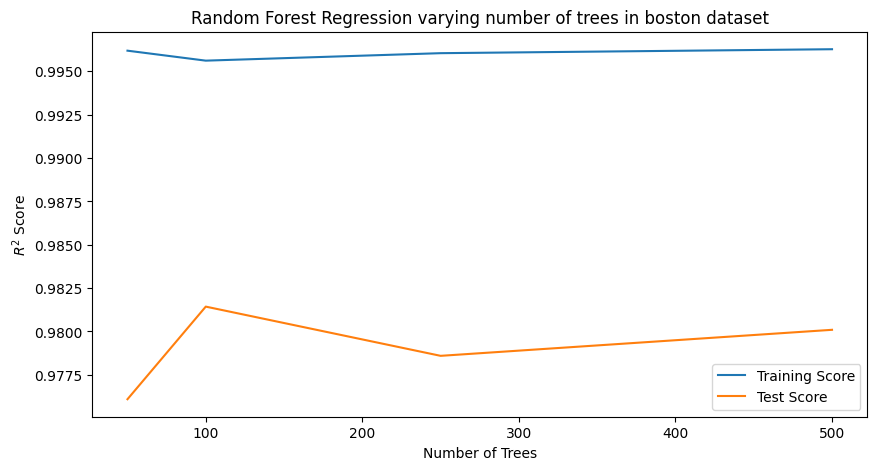

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=num_trees, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=num_trees, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel='Number of Trees',
       ylabel='$R^2$ Score',
       title='Random Forest Regression varying number of trees in boston dataset')
ax.legend()


### It seems that RF improves in case of increasing number of trees as it would average out the results showing more improvement

In [ ]:
train_score = []
test_score = []
samples_split = [1, 3, 5,25, 50, 100,500]
for s in samples_split:
    rf = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                               min_samples_split = s,
                               max_depth = best_params['max_depth'],
                               max_features = p)
    rf.fit(X_train_scaled, y_train.to_numpy())
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

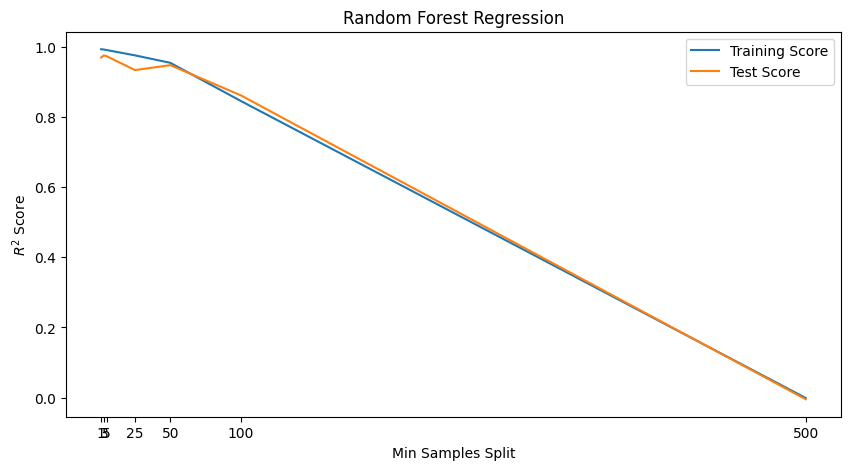

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=samples_split, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=samples_split, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Min Samples Split',
       ylabel = '$R^2$ Score',
       xticks =samples_split,
       title = 'Random Forest Regression')
ax.legend();

In [ ]:
train_score = []
test_score = []
depth = [2, 5, 8, 12,25,50]
for d in depth:
    rf = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = d,
                               max_features = p)
    rf.fit(X_train_scaled, y_train.to_numpy())
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

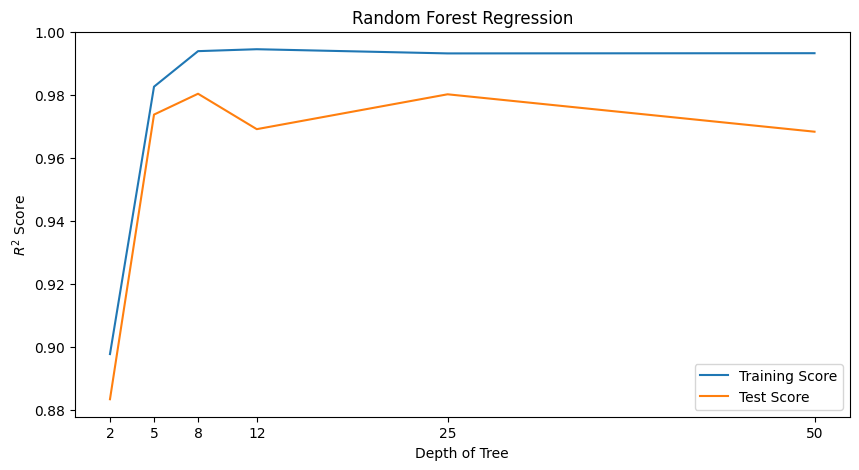

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=depth, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=depth, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Depth of Tree',
       ylabel = '$R^2$ Score',
       xticks = depth,
       title = 'Random Forest Regression')
ax.legend();

### Implementing Multilayer perceptron (NN)



In [ ]:
from MLP import MLP

I have set the default activation function to sigmoid

In [ ]:
# Define the architecture of the MLP
n_inputs = X_train_scaled.shape[1]
n_hidden1 = 30
n_hidden2 = 30
n_outputs = 1

# Create an instance of the MLP class
mlp = MLP(n_inputs, n_hidden1, n_hidden2, n_outputs)

# Train the MLP on the training set
mlp.fit(X_train_scaled, y_train.to_numpy())

# Evaluate the trained MLP on the test set
y_pred_test = mlp.predict(X_test_scaled)

# Compute and print the test MSE of the trained MLP
test_mse = mlp.mse_loss(y_test, y_pred_test)
print(f'Test MSE: {test_mse:.4f}')

epochs = 0 ============> loss 617.569480628166 
epochs = 50 ============> loss 45.458477439964845 
epochs = 100 ============> loss 26.2789938697225 
epochs = 150 ============> loss 14.646532566774885 
epochs = 200 ============> loss 9.058411004346242 
epochs = 250 ============> loss 6.3665838849542 
epochs = 300 ============> loss 4.84542636416743 
epochs = 350 ============> loss 3.882890051696142 
epochs = 400 ============> loss 3.219863692610054 
epochs = 450 ============> loss 6.721258313217091 
epochs = 500 ============> loss 5.242756906258662 
epochs = 550 ============> loss 4.496949512017346 
epochs = 600 ============> loss 3.9796145227056168 
epochs = 650 ============> loss 3.5961308084691055 
epochs = 700 ============> loss 3.325226791809409 
epochs = 750 ============> loss 3.124671504366946 
epochs = 800 ============> loss 2.9628165535641546 
epochs = 850 ============> loss 2.824013770661417 
epochs = 900 ============> loss 2.700943297472607 
epochs = 950 ============> loss 2.

In [ ]:
param_grid = { 'n_hidden1': [10, 20, 30], 'n_hidden2': [10, 20, 30], 'learning_rate': [0.001, 0.01, 0.1], 'n_epochs': [100,200,500, 1000] }
best_score = float('-inf')
best_params = {}
# Iterate over all possible combinations of hyperparameters
for h1 in param_grid['n_hidden1']:
    for h2 in param_grid['n_hidden2']:
        for lr in param_grid['learning_rate']:
            for ne in param_grid['n_epochs']:
                # Create an instance of the MLP class with the current hyperparameters
                mlp = MLP(n_inputs, h1, h2, n_outputs)
                # Train the MLP on the training set
                mlp.fit(X_train_scaled, y_train.to_numpy(), learning_rate=lr, n_epochs=ne)
                # Evaluate the trained MLP
                y_pred_test = mlp.predict(X_test_scaled)
                current_score = r2_score(y_test.to_numpy(), y_pred_test)
                # Update the best score
                if current_score > best_score:
                    best_score = current_score
                    best_params = {'n_hidden1': h1, 'n_hidden2': h2, 'learning_rate': lr, 'n_epochs': ne}
                print(f'For n_hidden1={h1}, n_hidden2={h2}, learning_rate={lr}, n_epochs={ne}, the current score is {current_score:.4f}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score:.4f}')

epochs = 0 ============> loss 522.0988091331375 
epochs = 50 ============> loss 189.17936318083906 
For n_hidden1=10, n_hidden2=10, learning_rate=0.001, n_epochs=100, the current score is -0.2339
epochs = 0 ============> loss 522.0988091331375 
epochs = 50 ============> loss 189.17936318083906 
epochs = 100 ============> loss 107.76761318643985 
epochs = 150 ============> loss 90.32524316105135 
For n_hidden1=10, n_hidden2=10, learning_rate=0.001, n_epochs=200, the current score is 0.0410
epochs = 0 ============> loss 522.0988091331375 
epochs = 50 ============> loss 189.17936318083906 
epochs = 100 ============> loss 107.76761318643985 
epochs = 150 ============> loss 90.32524316105135 
epochs = 200 ============> loss 85.3972214542064 
epochs = 250 ============> loss 81.10049662937747 
epochs = 300 ============> loss 75.21069485481334 
epochs = 350 ============> loss 68.98845191224312 
epochs = 400 ============> loss 63.61051559389359 
epochs = 450 ============> loss 59.1574835556573 

In [ ]:
train_losses = []
test_mses = []
n_epochs = 5000
learning_rate=best_params['learning_rate']
# Train the MLP for a fixed number of epochs
for epoch in range(1,n_epochs+1):
    # Forward pass: compute the predictions of the MLP on the training set
    y_pred, z1, a1, z2, a2 = mlp.forward_pass(X_train_scaled)

    loss = mlp.mse_loss(y_train, y_pred)
    train_losses.append(loss)

    # Backward pass
    d_z3, d_weights1, d_biases1, d_weights2, d_biases2, d_weights3, d_biases3 = mlp.backward_pass(X_train_scaled, y_train.to_numpy(), y_pred, z1, a1, z2, a2)
    mlp.update_weights_biases(learning_rate, d_weights1, d_biases1, d_weights2, d_biases2, d_weights3, d_biases3)

    # Evaluate the trained MLP on the test set
    y_pred_test = mlp.predict(X_test_scaled)

    test_mse = mlp.mse_loss(y_test, y_pred_test)
    test_mses.append(test_mse)

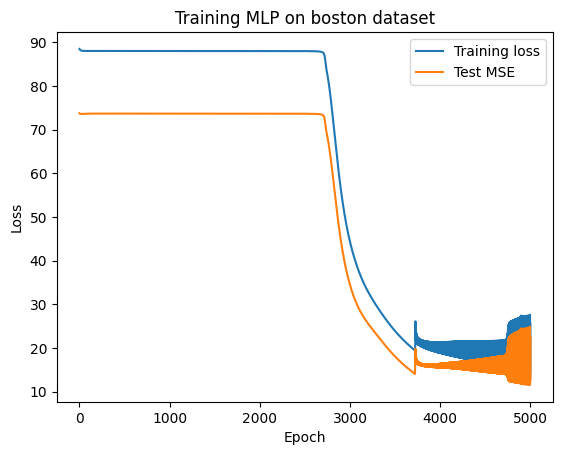

In [ ]:
plt.plot(train_losses, label='Training loss');
plt.plot(test_mses, label='Test MSE');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.title('Training MLP on boston dataset')
plt.legend();

In [ ]:
mlp_score=best_score

Implementing Kernel Ridge regression

In [ ]:
from KernelizedRidge import KernelizedRidgeRegression

In [ ]:
param_grid = {
    'kernel': ['linear', 'polynomial', 'rbf'],
    'alpha': [0.1, 1, 10, 50],
    'degree': [2, 3, 4]
}

best_score = 0.0
best_params = {}
score_saver = {}

for k in param_grid['kernel']:
    score_saver[k] = {}
    for a in param_grid['alpha']:
        score_saver[k][a] = {}
        for d in param_grid['degree']:
            rr = KernelizedRidgeRegression(alpha=a, kernel=k, degree=d)
            rr.fit(X_train_scaled, y_train.to_numpy())
            current_score = rr.score(X_test_scaled, y_test)
            score_saver[k][a][d] = current_score
            if current_score > best_score:
                best_score = current_score
                best_params = {'alpha': a, 'kernel': k, 'degree': d}
            print(f'For kernel={k}, alpha={a}, and degree={d}, the current score is {current_score:.4f}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score:.4f}')
krr_model_score= best_score

For kernel=linear, alpha=0.1, and degree=2, the current score is 0.9990
For kernel=linear, alpha=0.1, and degree=3, the current score is 0.9990
For kernel=linear, alpha=0.1, and degree=4, the current score is 0.9990
For kernel=linear, alpha=1, and degree=2, the current score is 0.9897
For kernel=linear, alpha=1, and degree=3, the current score is 0.9897
For kernel=linear, alpha=1, and degree=4, the current score is 0.9897
For kernel=linear, alpha=10, and degree=2, the current score is 0.8923
For kernel=linear, alpha=10, and degree=3, the current score is 0.8923
For kernel=linear, alpha=10, and degree=4, the current score is 0.8923
For kernel=linear, alpha=50, and degree=2, the current score is 0.6618
For kernel=linear, alpha=50, and degree=3, the current score is 0.6618
For kernel=linear, alpha=50, and degree=4, the current score is 0.6618
For kernel=polynomial, alpha=0.1, and degree=2, the current score is 0.9928
For kernel=polynomial, alpha=0.1, and degree=3, the current score is 0.9

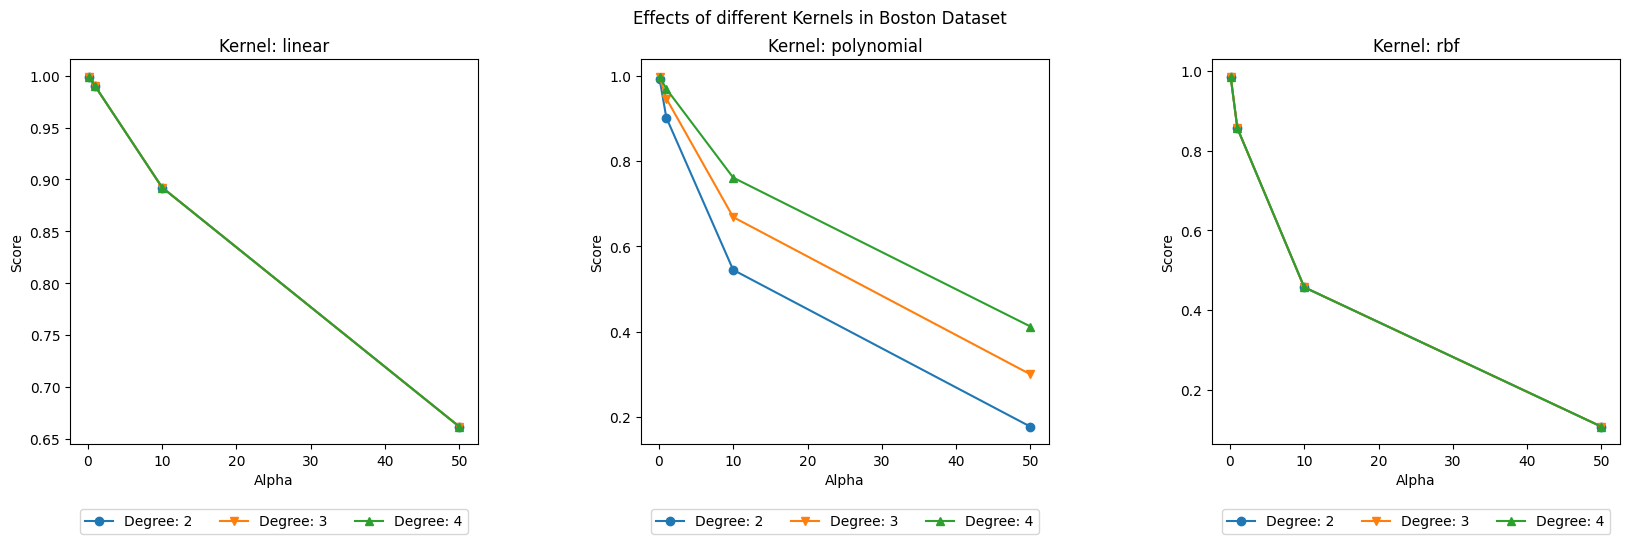

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.4)

markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']
for i, k in enumerate(param_grid['kernel']):
    ax = axs[i]
    for j, d in enumerate(param_grid['degree']):
        scores = [score_saver[k][a][d] for a in param_grid['alpha']]
        ax.plot(param_grid['alpha'], scores, label=f'Degree: {d}', marker=markers[j])
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Score')
    ax.set_title(f'Kernel: {k}')
    # Change the location of the legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.suptitle('Effects of different Kernels in Boston Dataset')
plt.show()


In [ ]:
temp = []
for k in param_grid['kernel']:
    for d in param_grid['degree']:
        for a in param_grid['alpha']:
            score = score_saver[k][a][d]
            temp.append({'Kernel': k, 'Degree': d, 'Alpha': a, 'Score': score})
df = pd.DataFrame(temp).pivot_table(index=['Kernel', 'Degree'], columns='Alpha', values='Score')
df

Alpha                  0.1       1.0       10.0      50.0
Kernel     Degree                                        
linear     2       0.999019  0.989704  0.892263  0.661814
           3       0.999019  0.989704  0.892263  0.661814
           4       0.999019  0.989704  0.892263  0.661814
polynomial 2       0.992772  0.902360  0.544944  0.177166
           3       0.997109  0.946973  0.668763  0.299986
           4       0.998143  0.969725  0.761379  0.412178
rbf        2       0.985396  0.856312  0.457027  0.107126
           3       0.985396  0.856312  0.457027  0.107126
           4       0.985396  0.856312  0.457027  0.107126

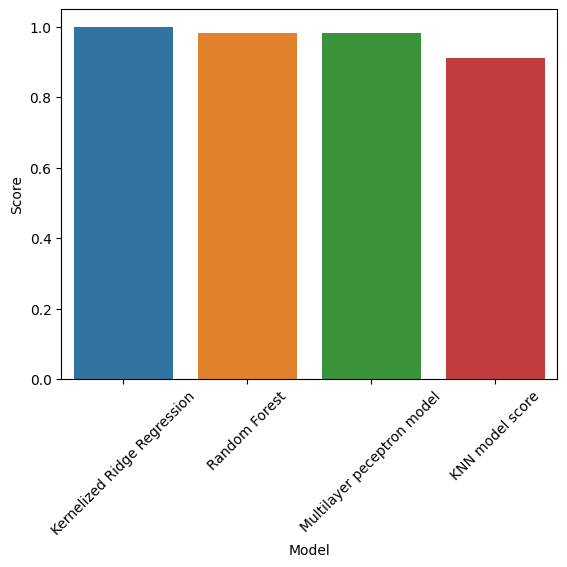

In [ ]:
final_comparisions = {'Kernelized Ridge Regression': krr_model_score, 'Multilayer peceptron model': mlp_score, 'Random Forest': random_forest_score, 'KNN model score': knn_model_score}

d = []
for model, score in final_comparisions.items():
    d.append({'Model': model, 'Score': score})

d = sorted(d, key=lambda x: x['Score'], reverse=True)

df = pd.DataFrame(d)

sns.barplot(data=df, x='Model', y='Score')
plt.xticks(rotation=45)
plt.show()


Remotiving very lowly corelated features and highly corelated features with target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['MEDV','LAT'], axis = 1), data['MEDV'], random_state = 1501)

Building a pipeline with best algorithm

In [ ]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', KernelizedRidgeRegression(alpha=0.1, kernel='linear', degree=2))
])

In [ ]:
pipe.fit(X_train.select_dtypes(include=['int64', 'float64']), y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor',
                 <KernelizedRidge.KernelizedRidgeRegression object at 0x7cba1860f700>)])

In [ ]:
y_pred = pipe.predict(X_test.select_dtypes(include=['int64', 'float64']))

In [ ]:
print(f'R^2 score: ',r2_score(y_test, y_pred))

R^2 score:  0.9983156668963727


An Inductive Conformal Predictor (ICP) provides validity to a model by producing prediction intervals that are guaranteed to have a certain level of coverage. An ideal ICP would have a coverage that is equal to or greater than 1 - significance for all significance levels, where significance is the probability that a new observation will fall outside the prediction interval. the average interval width represents the average size of the prediction intervals produced by the ICP. A smaller average interval width indicates that the ICP is producing more precise predictions, while a larger average interval width indicates that the predictions are less precise.

The average interval width is directly affected by the significance level used in the ICP. A lower significance level results in narrower prediction intervals and a smaller average interval width, while a higher significance level results in wider prediction intervals and a larger average interval width. By evaluating the average interval width as a function of the significance level, you can assess the trade-off between precision and coverage in the predictions made by the ICP.

In [ ]:
class InductiveConformalRegressor:
    def __init__(self, model):
        self.model = model

    def fit(self, X_train, y_train, X_cal, y_cal):
        # Fit underlying model to proper training set
        self.model.fit(X_train, y_train)

        # Calculate nonconformity scores for calibration set
        y_pred_cal = self.model.predict(X_cal)
        self.nc_scores_ = np.abs(y_pred_cal - y_cal)

    def predict(self, X, significance=0.05):
        # Make predictions using underlying model
        y_pred = self.model.predict(X)

        # Calculate prediction intervals
        n = len(self.nc_scores_)
        k = int(np.ceil(significance * n))
        threshold = np.partition(self.nc_scores_, -k)[-k]
        interval = np.abs(y_pred - threshold)
        lower = y_pred - interval
        upper = y_pred + interval


        return lower, upper


Split training set into proper training and calibration sets

In [ ]:
X_train, X_cal, y_train, y_cal = train_test_split(X_train.select_dtypes(include=['int64', 'float64']), y_train, test_size=0.25, random_state=0)

Fit ICP to training and calibration data

In [ ]:
icp = InductiveConformalRegressor(pipe)
icp.fit(X_train, y_train, X_cal, y_cal)

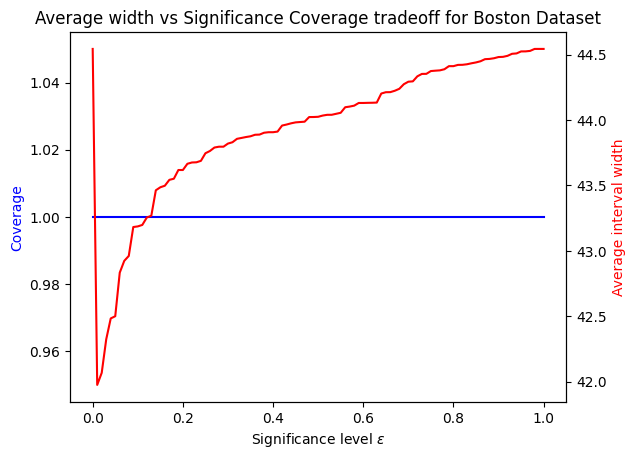

In [ ]:
significance_levels = np.linspace(0, 1, 101)
coverage = []
avg_width = []
# Calculating coverage and average interval width for each significance level
for significance in significance_levels:
    lower, upper = icp.predict(X_test.select_dtypes(include=['int64', 'float64']), significance=significance)

    # Calculating the coverage
    in_interval = np.logical_and(lower <= y_test, y_test <= upper)
    coverage.append(np.mean(in_interval))

    # Calculating average interval width
    width = upper - lower
    avg_width.append(np.mean(width))

# Plotting coverage and average interval width tradeoff with significance level
fig, ax1 = plt.subplots()
ax1.plot(significance_levels, coverage, label='Coverage', color='b')
ax1.set_xlabel('Significance level $\epsilon$')
ax1.set_ylabel('Coverage', color='b')
ax2 = ax1.twinx()
ax2.plot(significance_levels, avg_width, label='Average interval width', color='r')
ax2.set_ylabel('Average interval width', color='r')
plt.title('Average width vs Significance Coverage tradeoff for Boston Dataset')
plt.show()

We can see that coverage doesn't change for boston dataset while average with keeps on increasing significance level ϵ which provdes a validity for the above pipeline to be under inductive conformal